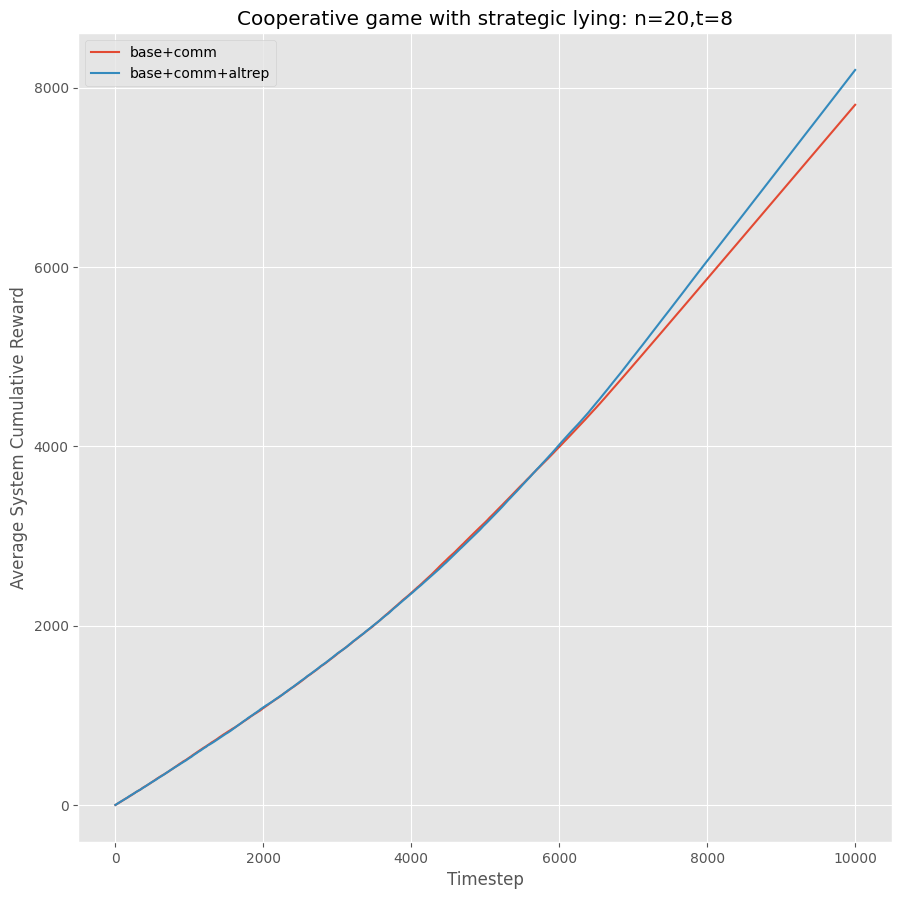

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

# set parameters
n = 20
t = 8

# load simulation results
cum_rew_1 = np.load(f'data/base_comm/n{n}t{t}_cum_rew_[-0.99,2].npy')
cum_rew_2 = np.load(f'data/base_comm_altrep/n{n}t{t}_cum_rew_[-0.99,2].npy')
#cum_rew_3 = np.load(f'data/base_comm/n{n}t{t}_cum_rew_[-0.99,3].npy')
#cum_rew_4 = np.load(f'data/base_comm/n{n}t{t}_cum_rew_[-0.99,5].npy')
# average over the simulations
cum_rew_1 = np.mean(cum_rew_1, axis=0)
cum_rew_2= np.mean(cum_rew_2, axis=0)
#cum_rew_3= np.mean(cum_rew_3, axis=0)
#cum_rew_4= np.mean(cum_rew_4, axis=0)
# plot cum rew graphs
plt.title(f'Cooperative game with strategic lying: n={n},t={t}')
plt.xlabel('Timestep')
plt.ylabel('Average System Cumulative Reward')

plt.plot(cum_rew_1, label='base+comm')
plt.plot(cum_rew_2, label='base+comm+altrep')
#plt.plot(cum_rew_3, label='[-0.99,3]')
#plt.plot(cum_rew_4, label='[-0.99,5]')

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

plt.legend()

In [18]:
actions_1 = np.load(f'data/base_comm/n{n}t{t}_actions_[-0.99,2].npy')
actions_2 = np.load(f'data/base_comm_altrep/n{n}t{t}_actions_[-0.99,2].npy')

print(f'Converged actions: {actions_1[-1,:]}')
print(f'Converged actions: {actions_2[-1,:]}')


Converged actions: [1.91 1.95 1.59 1.98 1.88 1.86 2.   1.97 1.83 1.95 1.83 1.7  1.99 1.96
 1.75 1.99 1.88 1.96 1.98 1.76]
Converged actions: [1.64 1.61 1.73 1.98 1.96 1.51 1.82 1.96 1.82 1.98 1.81 1.75 1.78 1.98
 1.97 1.74 1.89 1.72 1.95 1.63]


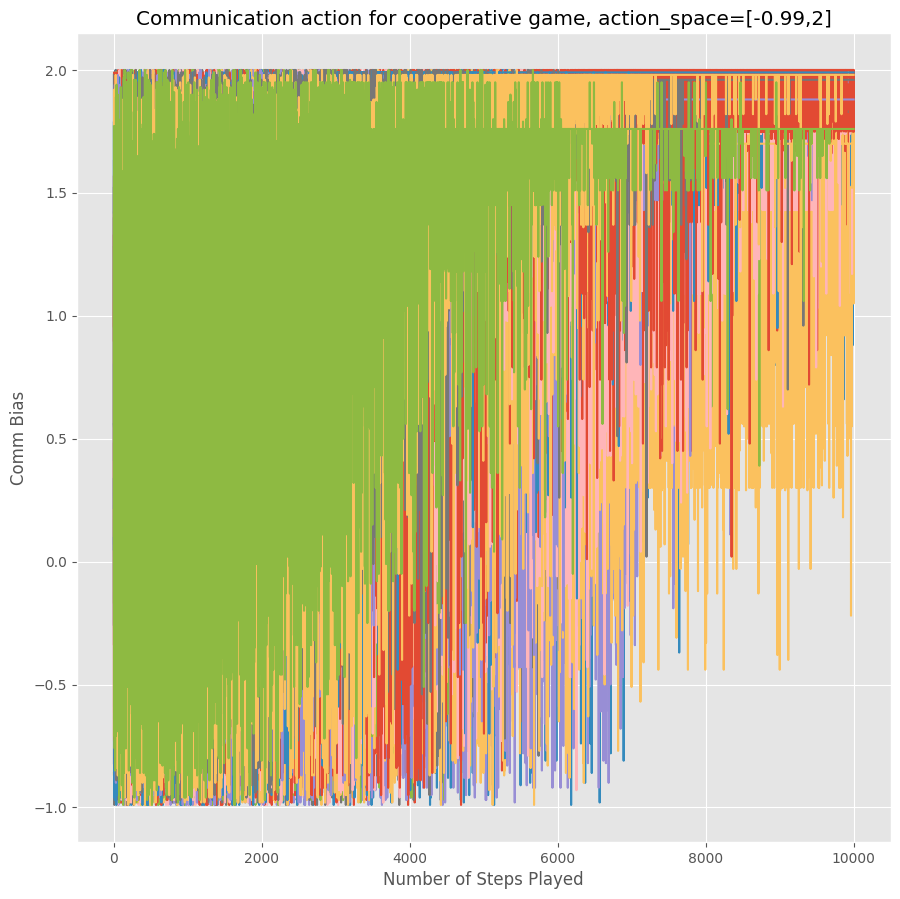

In [19]:
plt.xlabel('Number of Steps Played')
plt.ylabel('Comm Bias')
plt.title(f'Communication action for cooperative game, action_space=[-0.99,2]')
plt.plot(actions_1)

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)